In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the data
df = pd.read_csv('dataset/tokyosharehouse.csv')
df.head()

,idChamber,price,fee,space(m2),sexe,availablity,asKey,asDesk,asChair,asBed,...,distanceToTokyo University of Technology(km),distanceToTokyo University of the Arts(km),distanceToTokyo Woman's Christian University(km),distanceToTokyo Women's Medical University(km),distanceToTokyo Zokei University(km),distanceToToyo Gakuen University(km),distanceToToyo University(km),distanceToUniversity of the Sacred Heart(km),distanceToWaseda University(km),owner
0,S11,65000,12000,9.7,Female,Available,True,True,True,True,...,35.42,8.47,11.16,4.59,36.52,5.81,4.13,9.66,3.42,Orijign Co.Ltd
1,S12,0,0,7.5,Female,Occupied,True,True,True,True,...,35.42,8.47,11.16,4.59,36.52,5.81,4.13,9.66,3.42,Orijign Co.Ltd
2,S13,0,0,7.5,Female,Occupied,True,True,True,True,...,35.42,8.47,11.16,4.59,36.52,5.81,4.13,9.66,3.42,Orijign Co.Ltd
3,S21,0,0,9.7,Female,Occupied,True,True,True,True,...,35.42,8.47,11.16,4.59,36.52,5.81,4.13,9.66,3.42,Orijign Co.Ltd
4,S22,0,0,7.5,Female,Occupied,True,True,True,True,...,35.42,8.47,11.16,4.59,36.52,5.81,4.13,9.66,3.42,Orijign Co.Ltd


In [8]:
# have a look at the data
print(df.shape)
df.info()
df.describe()

(10918, 126)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10918 entries, 0 to 10917
Columns: 126 entries, idChamber to owner
dtypes: bool(15), float64(93), int64(10), object(8)
memory usage: 9.4+ MB


,price,fee,space(m2),houseId,longetide,latitude,medianPrice,medianFee,numberOfBed,nbShower,...,distanceToTokyo University of Science(km),distanceToTokyo University of Technology(km),distanceToTokyo University of the Arts(km),distanceToTokyo Woman's Christian University(km),distanceToTokyo Women's Medical University(km),distanceToTokyo Zokei University(km),distanceToToyo Gakuen University(km),distanceToToyo University(km),distanceToUniversity of the Sacred Heart(km),distanceToWaseda University(km)
count,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,1.091800e+04,10918.000000,...,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000,10918.000000
mean,31212.506869,8966.843744,14.123869,2184.485071,116.278466,29.706152,51577.379099,14139.192160,7.427501e+05,1.845668,...,2403.385016,2413.116077,2406.770185,2402.107006,2402.637937,2413.817758,2403.979083,2403.876247,2403.228664,2402.665595
std,27053.240114,7774.098462,315.753686,1195.373275,52.139495,13.309857,13905.784942,3288.008135,3.803696e+06,2.544375,...,5320.377996,5304.699902,5319.494019,5315.529882,5319.999337,5304.349138,5320.470893,5319.745568,5321.021024,5319.664133
min,0.000000,0.000000,-1.000000,9.000000,0.000000,0.000000,19500.000000,0.000000,3.000000e+00,0.000000,...,0.910000,6.860000,1.650000,1.160000,0.310000,8.140000,1.040000,0.310000,0.420000,0.000000
25%,0.000000,0.000000,8.260000,1335.000000,139.512042,35.553840,41250.000000,12000.000000,1.500000e+01,0.000000,...,9.710000,26.670000,12.780000,10.870000,8.610000,27.760000,9.930000,9.980000,9.500000,8.680000
50%,39000.000000,11500.000000,10.200000,2278.000000,139.641548,35.668070,50000.000000,14000.000000,3.600000e+01,0.000000,...,16.110000,34.650000,20.870000,17.310000,15.430000,35.470000,17.090000,18.240000,14.820000,16.460000
75%,54000.000000,15000.000000,13.000000,3198.000000,139.725629,35.718123,59250.000000,17800.000000,7.700000e+01,3.000000,...,29.050000,49.150000,35.060000,30.810000,29.760000,50.200000,28.920000,29.850000,27.590000,29.050000
max,158000.000000,80000.000000,33000.000000,4074.000000,140.923962,38.270598,136000.000000,30000.000000,2.023013e+07,9.000000,...,14270.510000,14245.300000,14271.920000,14258.430000,14268.920000,14245.220000,14271.310000,14269.590000,14271.790000,14268.200000


(5239, 126)

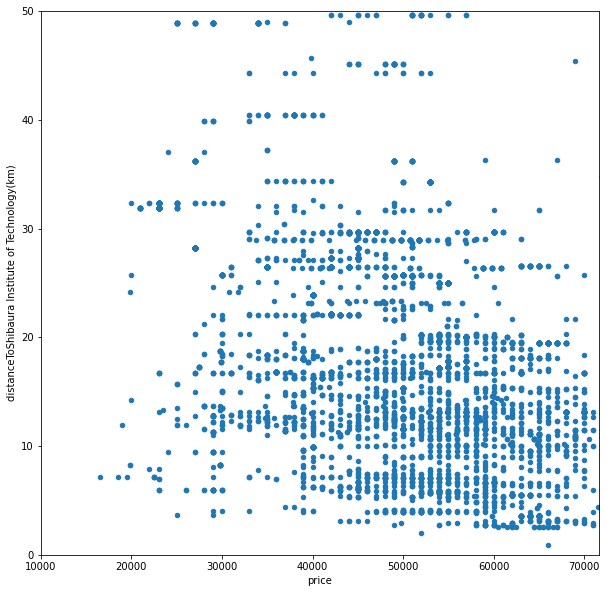

In [19]:
# know how many data points are on the future plot
df[(df['price'] > 10000) & (df['price'] < 71615) & (df['distanceToShibaura Institute of Technology(km)'] > 0) & (df['distanceToShibaura Institute of Technology(km)'] < 50)].shape
# display a plot
df.plot(kind='scatter', x='price', y='distanceToShibaura Institute of Technology(km)', xlim=(10000, 71615), ylim=(0, 50), figsize=(10, 10))
